In [1]:
import mysql.connector
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mysql.connector import Error
from datetime import datetime
mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="root@1324",
  database="taxi_ride"
)
mycursor = mydb.cursor(buffered=True)

Trip distance before using merge algorithm    : 26604.2
Trip distance after using merge algorithm     : 10104.3


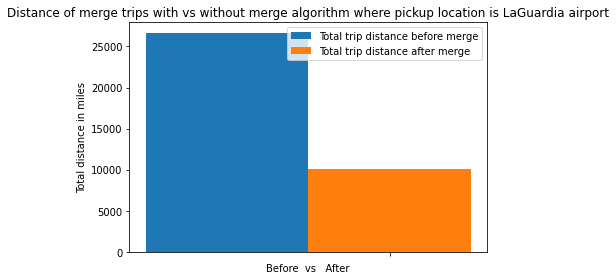

Total distance saved by using Merge Algorithm : 16499.8 miles = 62.02 %


In [2]:


mycursor.execute("SELECT * FROM merge_trip_pickup_laguardia")

myresult = mycursor.fetchall()
trip_distance_before_merge = myresult[len(myresult)-1][3]
trip_distance_after_merge = myresult[len(myresult)-1][4]
total_distance_saved = myresult[len(myresult)-1][5]
print("Trip distance before using merge algorithm    :", trip_distance_before_merge)
print("Trip distance after using merge algorithm     :", trip_distance_after_merge)

# data to plot
n_groups = 1
means_frank = (trip_distance_before_merge)
means_guido = (trip_distance_after_merge)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
#alpha=opacity,
#color='b',
label='Total trip distance before merge')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
#alpha=opacity,
#color='g',
label='Total trip distance after merge')

plt.xlabel('Before  vs   After')
plt.ylabel('Total distance in miles')
plt.title('Distance of merge trips with vs without merge algorithm where pickup location is LaGuardia airport')
plt.xticks(index + bar_width, (''))
plt.legend()

plt.tight_layout()
plt.show()

print("Total distance saved by using Merge Algorithm :", total_distance_saved, "miles =", float(np.round((total_distance_saved/trip_distance_before_merge)*100, 2)),"%")

Trip distance before using merge algorithm    : 18697.0
Trip distance after using merge algorithm     : 6459.09


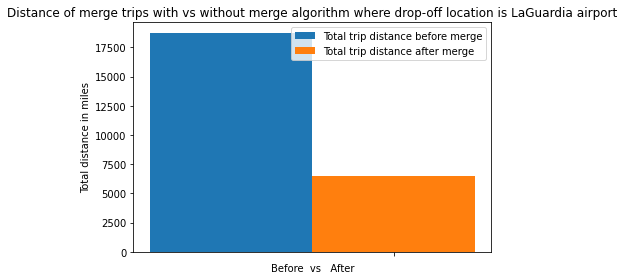

Total distance saved by using Merge Algorithm : 12237.9 miles = 65.45 %


In [3]:
mycursor.execute("SELECT * FROM merge_trip_dropoff_laguardia")

myresult = mycursor.fetchall()
trip_distance_before_merge = myresult[len(myresult)-1][3]
trip_distance_after_merge = myresult[len(myresult)-1][4]
total_distance_saved = myresult[len(myresult)-1][5]
print("Trip distance before using merge algorithm    :", trip_distance_before_merge)
print("Trip distance after using merge algorithm     :", trip_distance_after_merge)

# data to plot
n_groups = 1
means_frank = (trip_distance_before_merge)
means_guido = (trip_distance_after_merge)

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_frank, bar_width,
#alpha=opacity,
#color='b',
label='Total trip distance before merge')

rects2 = plt.bar(index + bar_width, means_guido, bar_width,
#alpha=opacity,
#color='g',
label='Total trip distance after merge')

plt.xlabel('Before  vs   After')
plt.ylabel('Total distance in miles')
plt.title('Distance of merge trips with vs without merge algorithm where drop-off location is LaGuardia airport')
plt.xticks(index + bar_width, (''))
plt.legend()

plt.tight_layout()
plt.show()

print("Total distance saved by using Merge Algorithm :", total_distance_saved, "miles =", float(np.round((total_distance_saved/trip_distance_before_merge)*100, 2)),"%")

Enter data in dd/MM/yyy format:
03/07/2019


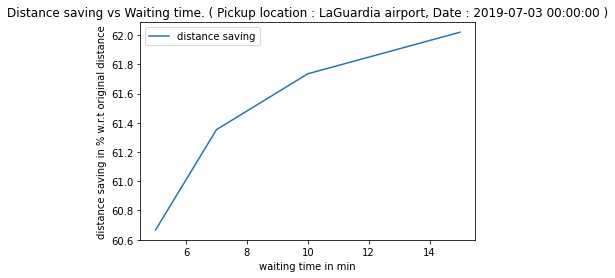

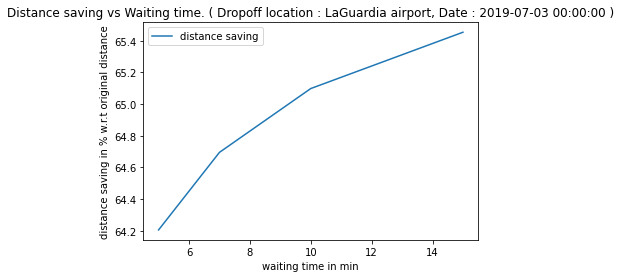

In [4]:
print("Enter data in dd/MM/yyy format:")
date = input()
date = datetime.strptime(date, '%d/%m/%Y')

# Analysis for trips starting from Laguardia airpot

mycursor.execute("SELECT * FROM merge_trip_pickup_laguardia where date = '{0}'".format(date))
myresult = mycursor.fetchall()
df = pd.DataFrame(myresult)
df.head()
df[5] = (df[5] / df[3]) *100
df1 = df.iloc[:,[False,False,True,False,False,True]]
df1.columns = ['waiting time','distance saving']
df1.plot(x='waiting time', y='distance saving', kind='line')
plt.ylabel('distance saving in % w.r.t original distance')
plt.xlabel('waiting time in min')
plt.title('Distance saving vs Waiting time. ( Pickup location : LaGuardia airport, Date : {0} )'.format(date))
plt.show()

# Analysis for trips ending to Laguardia airpot
mycursor = mydb.cursor()
mycursor.execute("SELECT * FROM merge_trip_dropoff_laguardia where date = '{0}'".format(date))
myresult = mycursor.fetchall()

df = pd.DataFrame(myresult)
df.head()

df[5] = (df[5] *100 / df[3])
df1 = df.iloc[:,[False,False,True,False,False,True]]
df1.columns = ['waiting time','distance saving']
df1.plot(x='waiting time', y='distance saving', kind='line')
plt.ylabel('distance saving in % w.r.t original distance')
plt.xlabel('waiting time in min')
plt.title('Distance saving vs Waiting time. ( Dropoff location : LaGuardia airport, Date : {0} )'.format(date))
plt.show()


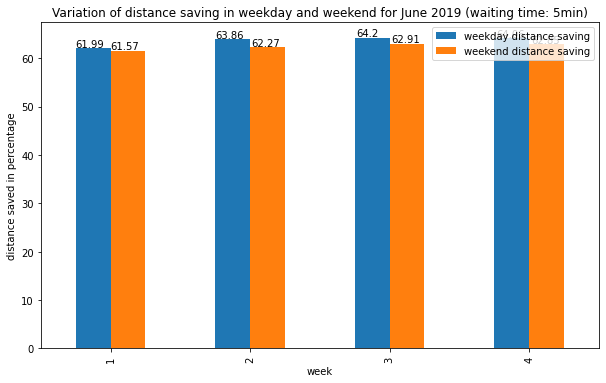

Total weekday distance saving:  63.71 %
Total weekend distance saving:  62.39 %


In [5]:
df = pd.read_csv('reports.csv')
df.head()
total = df.sum(axis = 0, skipna = True)
df['WeekDayDistanceSaving'] = np.round(df['WeekDayDistanceSaving'] * 100 / df['WeekDayDistanceBeforeMerge'],2)
df['WeekEndDistanceSaving'] = np.round(df['WeekEndDistanceSaving'] * 100 / df['WeekEndDistanceBeforeMerge'],2)
df1 = df.iloc[:,[True,False,False,False,False,False,False,True,True]]
df1.columns = ['week','weekday distance saving', 'weekend distance saving']
ax = df1.plot(x="week", y=['weekday distance saving', 'weekend distance saving'], kind='bar',figsize=(10, 6))
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
plt.ylabel('distance saved in percentage')
plt.title('Variation of distance saving in weekday and weekend for June 2019 (waiting time: 5min)')
plt.show()

print("Total weekday distance saving: ", float(np.round((total['WeekDayDistanceSaving']/total['WeekDayDistanceBeforeMerge'])*100, 2)),"%")
print("Total weekend distance saving: ", float(np.round((total['WeekEndDistanceSaving']/total['WeekEndDistanceBeforeMerge'])*100, 2)),"%")